# Part II - The Effects of Borrower's Credit Profile on Loan Interest Rate
## by Dorothy Kunth

## Investigation Overview

The main goal of this investigation is to establish whether the Prosper ratings and Prosper scores have a strong effect on loan interest rate (borrower rate). Some of the characteristics of the loans that are listed are also investigated to verify which features affect the originaton of the loans. The investigation also includes whether the number of investors is driven by the borrower's income range or Prosper rating or both.



## Dataset Overview
Two dataframes will be used. One is df_prosper which has 113,937 loans and 7 variables (BorrowerRate, ProsperRating (Alpha), ProsperScore, LoanOriginalAmount, IncomeRange, EmploymentStatus and Investors). The other dataframe is df_prosper_rating which has 84853 loans and the same 7 variables. 

df_prosper_rating is the dataframe created where the variables: ProsperRating (Alpha) and ProsperScore are not null. There are 29084 records with null values in ProsperRating (Alpha) and ProsperScore columns as these features are applicable only for loans originated after July 2009. Since it is a lot of records - about 25% of the total records, the df_prosper_rating will be used for analysis where the said variables are involved.

In [53]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [54]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosper_loan_data.csv')

In [55]:
# select the variables/columns to explore and store in df_prosper dataframe
target_columns = [
    'LoanOriginalAmount', 'BorrowerRate', 'ProsperRating (Alpha)', 'ProsperScore', 'EmploymentStatus', 
    'IncomeRange', 'Investors'
]

df_prosper = df[target_columns]

In [56]:
# convert ProsperRating (Alpha) and IncomeRange into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'IncomeRange': ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', 
                     '$50,000-74,999', '$75,000-99,999', '$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_prosper[var] = df_prosper[var].astype(ordered_var)

In [57]:
# fill the null values with 'not stated' for EmploymentStatus
df_prosper['EmploymentStatus'] = df_prosper['EmploymentStatus'].fillna('Not available')

In [58]:
# select records where 'ProsperRating (Alpha)' is not null and store in df_prosper_rating dataframe
df_prosper_rating = df_prosper[df_prosper['ProsperRating (Alpha)'].notnull()]

## 1. Distribution of Loan Interest Rate

Loan interest rate ranges from 0 to maximum of 49.75%. There are 2294 unique interest rates. Bins are adjusted using numpy.arange() to have an evenly spaced values within a given interval. When plotted, the distribution appears to be  multimodal with peaks somewhere between 11-12%, high peak between 15-16%, another peak between 24-26% and with the highest peak between 31-32%.

In [59]:
df_prosper['BorrowerRate'].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

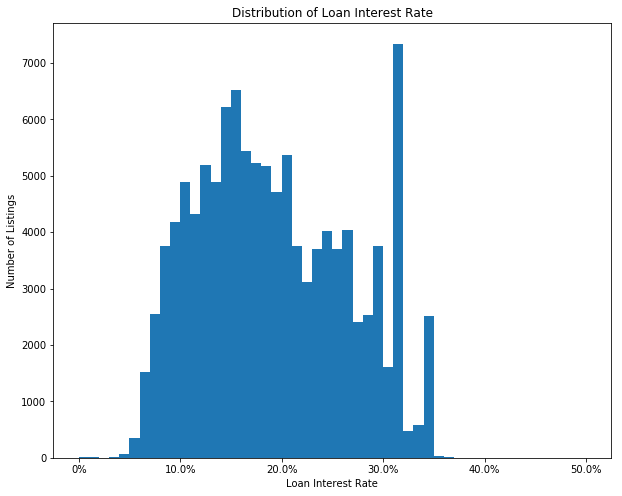

In [60]:
bins = np.arange(0, df_prosper['BorrowerRate'].max()+0.01, 0.01)
plt.figure(figsize=[10, 8])
plt.hist(data=df_prosper, x = 'BorrowerRate', bins = bins);
plt.xlabel('Loan Interest Rate');
plt.ylabel('Number of Listings');
plt.title('Distribution of Loan Interest Rate');
xticks = [0, 0.10, 0.20, 0.30, 0.40, 0.50]
xtick_vals = ['{}%'.format(x*100) for x in xticks]
plt.xticks(xticks, xtick_vals);

## 2. Correlation between Loan Interest Rate and Prosper Rating

The violin plot and box plot show that the borrower rate has a negative correlation with Prosper rating. The downward trend indicates that the higher the loan interest rate, the lower the rating and obviously, when the rating is high, the loan interest rate is low.

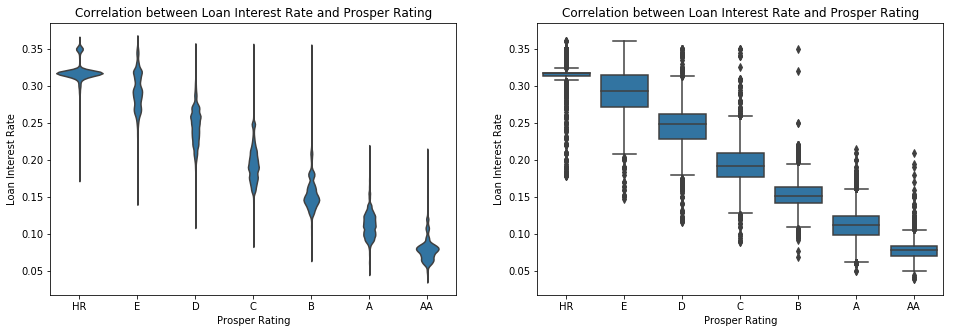

In [61]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_prosper_rating, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', 
                    color = base_color, inner = None);
plt.xlabel('Prosper Rating');
plt.ylabel('Loan Interest Rate');
plt.title('Correlation between Loan Interest Rate and Prosper Rating');

plt.subplot(1, 2, 2)
sb.boxplot(data = df_prosper_rating, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', color = base_color);
plt.xlabel('Prosper Rating');
plt.ylabel('Loan Interest Rate');
plt.title('Correlation between Loan Interest Rate and Prosper Rating');

plt.ylim(ax1.get_ylim()); 

## 3. Correlation between Loan Interest Rate and Prosper Score

To visualize the correlation between two numeric variables: loan interest rate and Prosper score, a scatterplot and a heatmap were created. The loan interest rate has a negative correlation with Prosper score based on both scatterplot and heatmap. The scatterplot shows that the slope is negative - the higher the loan interest rate, the lower the Prosper score. The heatmap shows a negative trend as well with one area of high frequency at the lower right part.

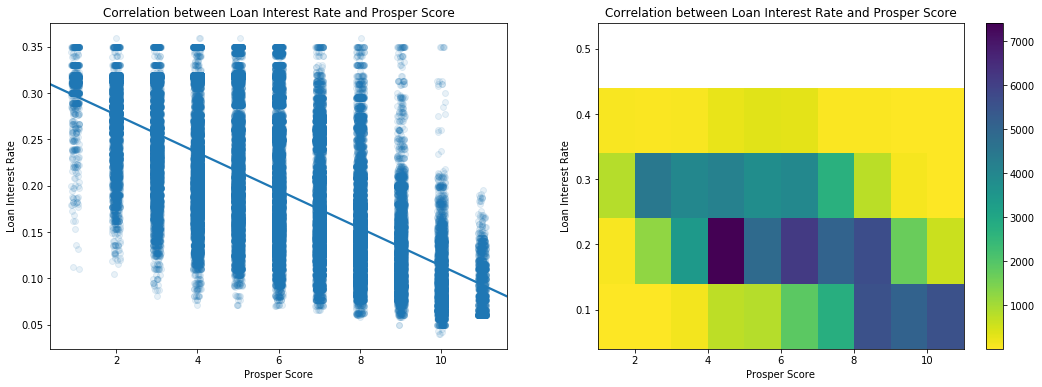

In [62]:
plt.figure(figsize = [18, 6])

plt.subplot(1, 2, 1)
sb.regplot(data = df_prosper_rating, x = 'ProsperScore', y = 'BorrowerRate', x_jitter = 0.1, 
           scatter_kws={'alpha':1/10}, fit_reg = True)
plt.xlabel('Prosper Score')
plt.ylabel('Loan Interest Rate');
plt.title('Correlation between Loan Interest Rate and Prosper Score');

bins_x = np.arange(df_prosper_rating['ProsperScore'].min(), df_prosper['ProsperScore'].max()+1, 1)
bins_y = np.arange(df_prosper_rating['BorrowerRate'].min(), df_prosper['BorrowerRate'].max()+0.10, 0.10)

plt.subplot(1, 2, 2)
plt.hist2d(data = df_prosper, x = 'ProsperScore', y = 'BorrowerRate', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Prosper Score')
plt.ylabel('Loan Interest Rate');
plt.title('Correlation between Loan Interest Rate and Prosper Score');

## 4. Loan Amount in USD by Loan Interest Rate and Prosper Score
Here is a scatterplot to visualize the relationship of three (3) numeric variables: loan amount, loan interest rate and Prosper score. The scatterplot shows majority of the darker dots are on the upper and left part of the map. This indicates that majority of lower loan amounts have lower Prosper score and higher interest rate. It is also evident that listings with the highest Prosper score of 10-11 fell between the loan interest rates of 5-10% and distributed between USD 1,000 to USD 20,000 loan amounts.

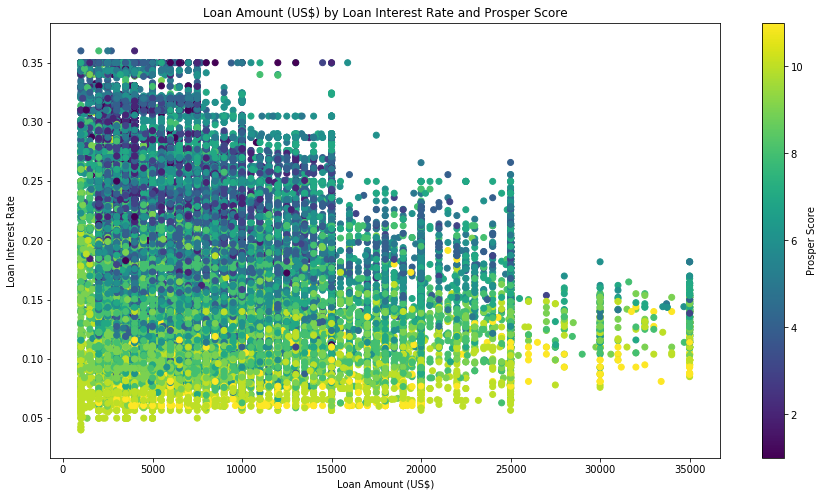

In [63]:
plt.figure(figsize = [15, 8])
plt.scatter(data = df_prosper_rating, x = 'LoanOriginalAmount', y = 'BorrowerRate', c ='ProsperScore')
plt.colorbar(label = 'Prosper Score')
plt.xlabel('Loan Amount (US$)')
plt.ylabel('Loan Interest Rate');
plt.title('Loan Amount (US$) by Loan Interest Rate and Prosper Score');

## 5. Distribution of Borrowers' Annual Income Range

The bar chart shows that the top two income ranges are USD 25,000-49,999 and USD 50,000-74,999 respectively. When combined together, it makes up the 55% of the total loan listings. Income range USD 75,000-99,000 and USD 100,000+ when combined together makes up the 30% of the total loan listings. 

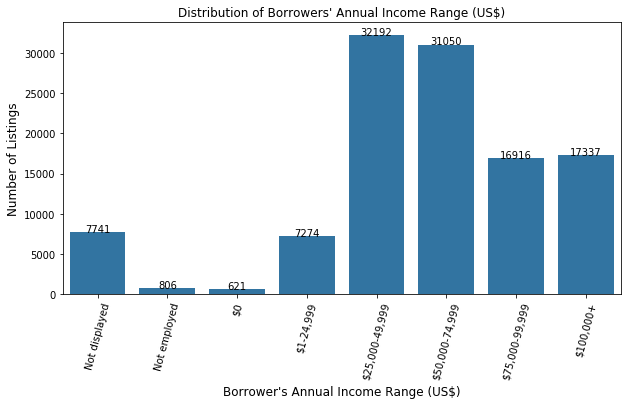

In [64]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
bar = sb.countplot(data=df_prosper, x = 'IncomeRange', color = base_color);
bar.set_xlabel("Borrower's Annual Income Range (US$)", fontsize = 12);
bar.set_ylabel('Number of Listings', fontsize = 12);
bar.set_title("Distribution of Borrowers' Annual Income Range (US$)");
plt.xticks(rotation = 75);
for n in bar.patches:
    height = n.get_height()
    bar.text(n.get_x() + n.get_width()/2., height + 0.1, height, ha = 'center')

## 6. Distribution of Loan Amount

Loan amount ranges from USD 1,000 to USD 35,000. There are 2468 unique loan amounts. Bins are adjusted using numpy.arange() to have an evenly spaced values within a given interval. The distribution appears to be a bit right skewed with three very high peaks at USD 4,000, USD 10,000 and USD 15,000.

In [65]:
df_prosper['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

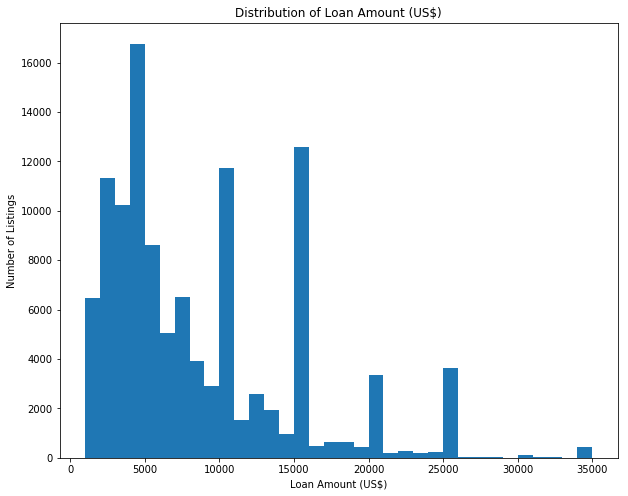

In [66]:
bins = np.arange(1000, df_prosper['LoanOriginalAmount'].max() + 1000, 1000)
plt.figure(figsize=[10, 8])
plt.hist(data=df_prosper, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Loan Amount (US$)');
plt.ylabel('Number of Listings');
plt.title('Distribution of Loan Amount (US$)');

## 7. Loan Amount (USD) vs Prosper Rating, Borrower's Employment Status and Borrower's Annual Income Range

Here is a boxplot PairGrid to visualize pair-wise relationship between loan amount and the three categorical variables: Prosper rating, borrower's employment status and borrower's annual income range. For loan amount vs Prosper rating, the boxplot shows that majority of the loan amounts from USD 4,000 to USD 15,000 have the ratings of AA, A, B and C. The low ratings E and HR appear to be having a few loans in the amount below USD 5,000. Although there are a few outliers in these low ratings which shows there are a few loans in the amounts approximately between USD 4,000 to USD 18,000. 

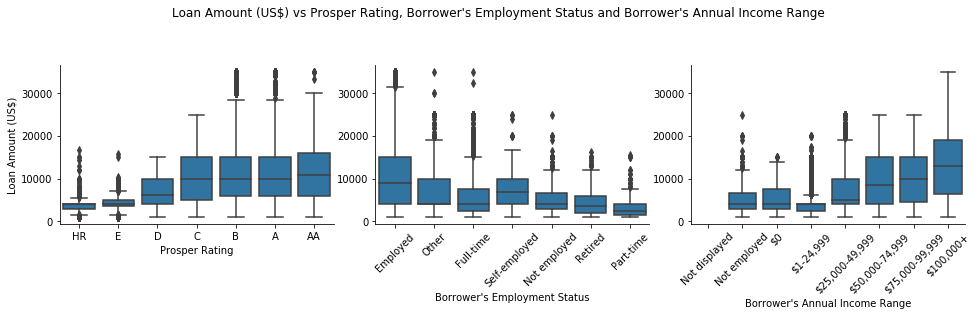

In [67]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x = x, y = y, color = default_color);

plt.figure(figsize = [10, 10]);
g = sb.PairGrid(data = df_prosper_rating, y_vars = ['LoanOriginalAmount'], 
                x_vars = ['ProsperRating (Alpha)', 'EmploymentStatus', 'IncomeRange'], size = 3, aspect = 1.5,);
g.map(boxgrid);
g.axes[0,0].set_xlabel('Prosper Rating');
g.axes[0,1].set_xlabel("Borrower's Employment Status");
g.axes[0,2].set_xlabel("Borrower's Annual Income Range");
g.axes[0,0].set_ylabel('Loan Amount (US$)');
plt.suptitle("Loan Amount (US$) vs Prosper Rating, Borrower's Employment Status and Borrower's Annual Income Range" , 
             fontsize = 12, y = 1.2);

for ax in g.axes.flat[1:3]:
    ax.tick_params(axis = 'x', rotation = 45);
plt.show();

## 8. Average Number of Investors by Borrower's Annual Income Range and Prosper Rating

The bar chart shows that the number of investors has a positive relationship with Prosper rating. It indicates that the investors fund more on loans that have higher ratings. However, the number of investors does not have a direct relationship with borrower's annual income range. It shows that investors fund loans regardless of borrower's income range or whether the borrower has no income.  

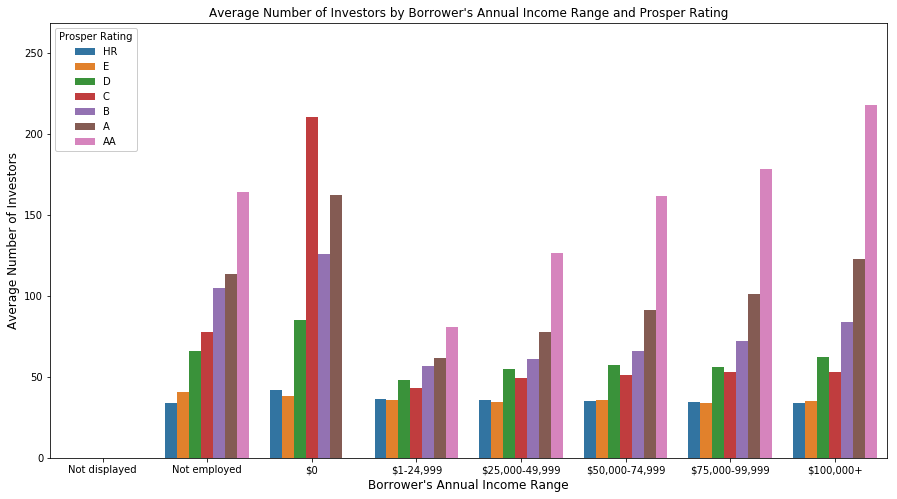

In [68]:
plt.figure(figsize = [15, 8])
ax = sb.barplot(data = df_prosper, x = 'IncomeRange', y = 'Investors', hue = 'ProsperRating (Alpha)', errwidth = 0)
ax.legend(loc = 2, ncol = 1, framealpha = 1, title = 'Prosper Rating');
plt.ylabel("Average Number of Investors",size= 12);
plt.xlabel("Borrower's Annual Income Range",size= 12);
plt.title("Average Number of Investors by Borrower's Annual Income Range and Prosper Rating",size = 12);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Loan_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Loan_slide_deck.ipynb to slides
[NbConvertApp] Writing 955393 bytes to Loan_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Loan_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not found
/us

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
